In [1]:
%matplotlib inline  
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Model based segmentation

Until now, image segmentation has been considered as a bottom-up process, where connected pixels are grouped together based on some sort of rule based on gray levels, borders, ... In some cases, the objects that are looked for are a priori known. This process is thus called top-down. An example explained later on is the use of the Hough transform when looking for lines and circles.

## Livewire

The livewire algorithm is an interactive segmentation method that helps the user to delineate object borders in an image. The user select some points located near the object boundary and the algorithm connects them using the lowest cost path algorithm, by Edsger W. Dijkstra, which is explained below. The image is first convolved with a Sobel filter to extract edges. Each pixel of the resulting image has a 4-neighbours structuring element around it. The edge costs are defined based on a cost function build around this neighbourhood. Later on some extension work has been made on livewire segmentation tool, which is known as Intelligent Scissors.
|Example of the application of a live-wire segmentation process|Example of the application of the Intelligent Scissors|
|:-:|:-:|
|<img src="../data/lifewire.png" alt="Example of the application of a live-wire segmentation process" title="Example of the application of a live-wire segmentation process" width="500"/>|<img src="../data/lw1.png" alt="Example of the application of the Intelligent Scissors" title="Example of the application of the Intelligent Scissors" width="300"/>|

### Principle

1. The user places some seed points on the edges of the object.
2. The program locally computes the best path between these points, according to Dijkstra's shortest path algorithm.
3. The computation of step 2 should be fast enough to propose an interactive optimal path.

Move from one pixel to one of its neighbours

* graph = image latice
* search space = every pixel of the image
* Cost
* local (related to the edge detection etc. )
* euclidian distance from previous position

Local costs between points p and q

* Laplacian zero crossing, fZ,
* gradient magnitude,fG,
* and gradient direction, fD

$l(\bf p,bf q) = \omega_G . f_G(\bf q)+\omega_Z . f_Z(\bf q)+\omega_D . f_G(\bf p,\bf q)$

gradient magnitude, $f_G$: 

$f_G = 1 - \frac{G}{max(G)}$

Laplacian zero crossing, $f_Z$,

1 if sign change in the neighbourhood 

a ‘good’ pixel to place a border

gradient direction, $f_D$

$f_D(\bf p,\bf q) = \frac{2}{3\pi}\{[\cos(d_p(\bf p,\bf q))]^{-1}+[\cos(d_p(\bf p,\bf q))]^{-1}\}$

$\bf D(p)$ be the unit vector which is normal to the gradient direction at point

\bf D(p) = (G_y(\bf p),-G_x(\bf p))

where

are vector dot product and

$ d_p(\bf p,\bf q) = \bf D(\bf p) . L(\bf p,\bf q) $

$ d_a(\bf p,\bf q) = L(\bf p,\bf q) . \bf D(\bf q) $

$L(\bf p, \bf q)=\left \{\begin{array}{ll}
\bf q - \bf p,\quad \text{if} \quad  D(\bf p).(\bf q-\bf p) \ge 0\\
\bf p - \bf q,\quad \text{if} \quad  D(\bf p).(\bf q-\bf p) < 0\\
\end{array}
\right.$

The direction feature cost is low when the gradient direction of the two pixels are similar to each other and the link between them.

pros

* general, few initialization
* real-time
* direct control

cons

* resolution = pixel (> subpixel)
* contour depend on weight
* slow for 3D and high resolution


### Dijkstra shortest path algorithm

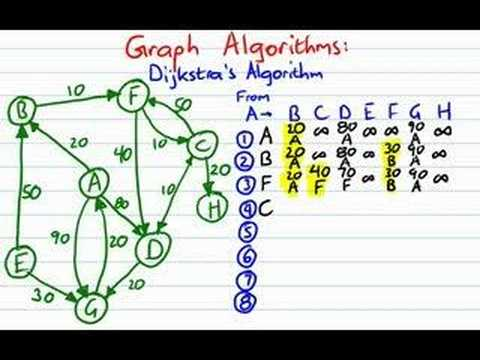

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('8Ls1RqHCOPw')